In [8]:
from round_robin import round_robin
import matplotlib.pyplot as plt
import random

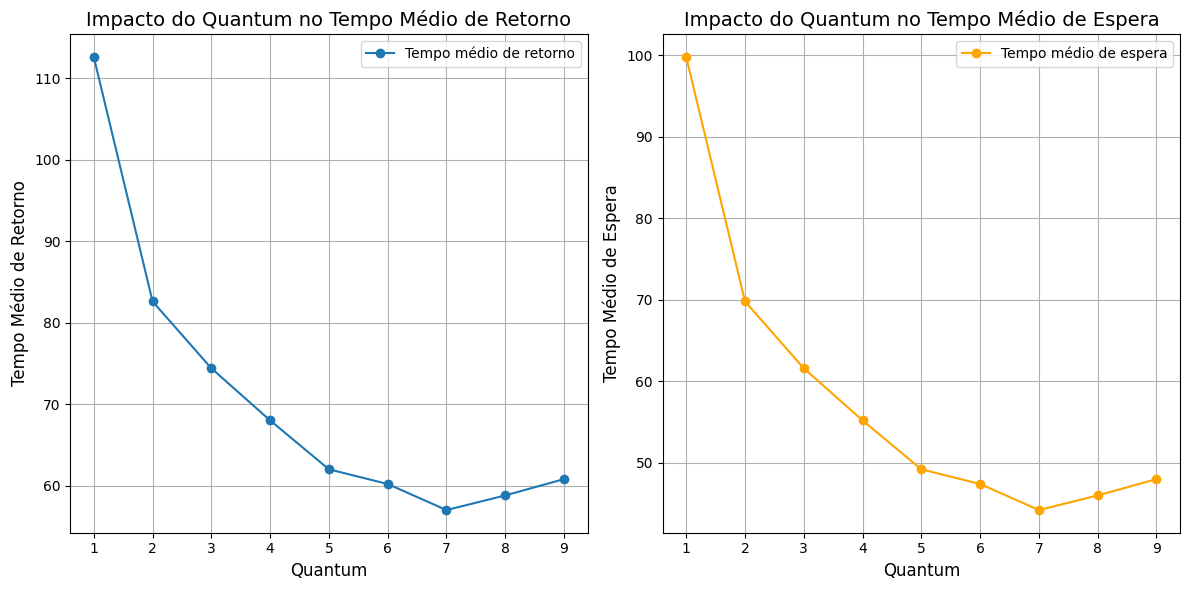

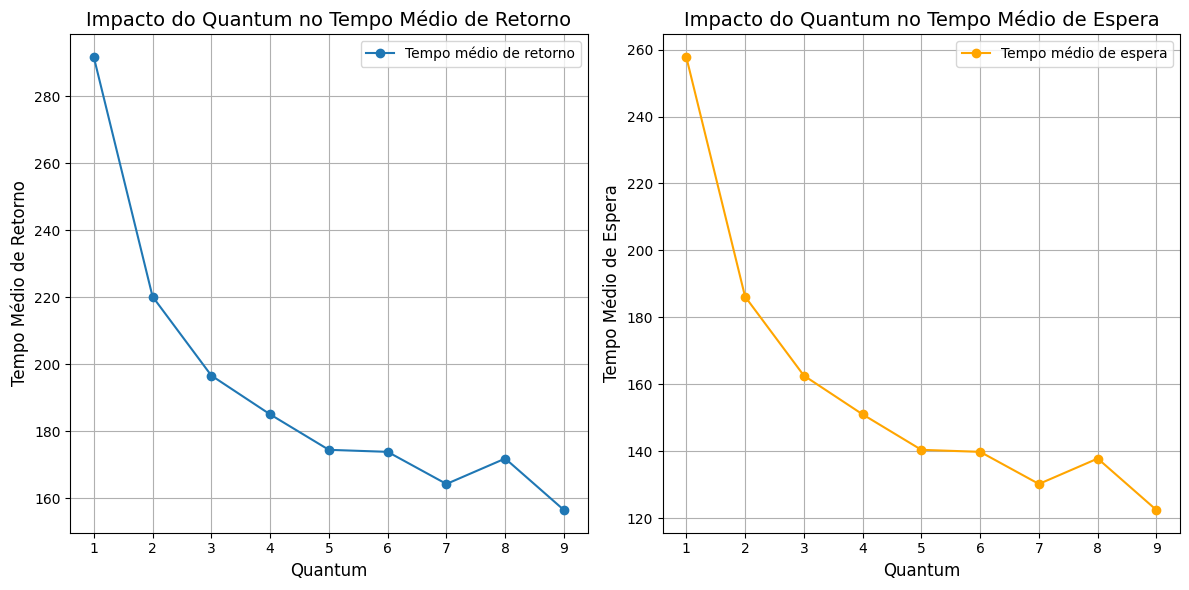

In [11]:
def generate_burst_times(n, t1, t2, t3, t4):
    burst_times_short = [random.randint(t1, t2) for _ in range(n)]
    burst_times_long = [random.randint(t3, t4) for _ in range(n)]
    return [burst_times_short, burst_times_long]
n = 5
t1, t2 = 10, 15  # Burst times curtos
t3, t4 = 25, 50  # Burst times longos
processes = list(range(1, n + 1))
interval = 5

# Gerar tempos de burst
burst_times = generate_burst_times(n, t1, t2, t3, t4)
# Intervalos de quantum
quantum_range = range(1, 10)

for burst_time in burst_times:

    # Cálculo para cada valor de quantum
    avg_turnaround = []
    avg_waiting = []
    throughput_intervals = []
    for quantum in quantum_range:
        turnaround, waiting, throughput = round_robin(processes, burst_time, quantum, interval)
        avg_turnaround.append(turnaround)
        avg_waiting.append(waiting)
        throughput_intervals.append(throughput)

    # Gráficos
    plt.figure(figsize=(12, 6))

    # Tempo médio de retorno
    plt.subplot(1, 2, 1)
    plt.plot(quantum_range, avg_turnaround, marker='o', label='Tempo médio de retorno')
    plt.title('Impacto do Quantum no Tempo Médio de Retorno', fontsize=14)
    plt.xlabel('Quantum', fontsize=12)
    plt.ylabel('Tempo Médio de Retorno', fontsize=12)
    plt.grid(True)
    plt.legend()

    # Tempo médio de espera
    plt.subplot(1, 2, 2)
    plt.plot(quantum_range, avg_waiting, marker='o', label='Tempo médio de espera', color='orange')
    plt.title('Impacto do Quantum no Tempo Médio de Espera', fontsize=14)
    plt.xlabel('Quantum', fontsize=12)
    plt.ylabel('Tempo Médio de Espera', fontsize=12)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()
